# Rice Prediction:SimpleNN Moudle

# Prepare data


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist

import pandas as pd 
from numpy import genfromtxt
import seaborn as sns


In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [ ]:
tf.__version__

'2.12.0'

In [ ]:
#pillow image manipulation library
from PIL import Image

#display funtion to present the image inline in Jupyter
from IPython.display import display

#path to figures directory
figuresPath = '/content/rice/'

### X_train,y_train

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/data/rice.zip"

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: rice/train_img/img-9055.jpg  
  inflating: __MACOSX/rice/train_img/._img-9055.jpg  
  inflating: rice/train_img/img-6366.jpg  
  inflating: __MACOSX/rice/train_img/._img-6366.jpg  
  inflating: rice/train_img/img-1409.jpg  
  inflating: __MACOSX/rice/train_img/._img-1409.jpg  
  inflating: rice/train_img/img-7078.jpg  
  inflating: __MACOSX/rice/train_img/._img-7078.jpg  
  inflating: rice/train_img/img-9041.jpg  
  inflating: __MACOSX/rice/train_img/._img-9041.jpg  
  inflating: rice/train_img/img-6372.jpg  
  inflating: __MACOSX/rice/train_img/._img-6372.jpg  
  inflating: rice/train_img/img-4565.jpg  
  inflating: __MACOSX/rice/train_img/._img-4565.jpg  
  inflating: rice/train_img/img-963.jpg  
  inflating: __MACOSX/rice/train_img/._img-963.jpg  
  inflating: rice/train_img/img-2114.jpg  
  inflating: __MACOSX/rice/train_img/._img-2114.jpg  
  inflating: rice/train_img/img-2672.jpg  
  inflating: __MACOSX/rice/train_img/._img-2672.jpg  
  inf

In [ ]:
X_train = []
y_train = pd.read_csv("/content/rice/train_label.csv")

# train-test
for i in range(10000):
  i = i+1
  train_img = Image.open(figuresPath + 'train_img/img-' + str(i) +'.jpg').convert('L')
  tri = np.array(train_img)
  X_train.append(tri)

#  print(array)
X_train=np.array(X_train)
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
# Convert the data of English characters into five integer labels of 0-4
y_train_num = y_train.copy()
count = 0

for i in y_train_num['train_label']:
  if i == 'Arborio':
     y_train_num.loc[count] = 0
  elif i == 'Basmati':
     y_train_num.loc[count] = 1
  elif i == 'Ipsala':
     y_train_num.loc[count] = 2
  elif i == 'Jasmine':
     y_train_num.loc[count] = 3
  else:
     y_train_num.loc[count] = 4

  count = count+1

list1 = y_train_num['train_label']
#for i in y_train_num['Arborio']:
  #list1.append(i)

list1.tolist()
y_train_num = np.array(list1)

y_train_num = y_train_num.astype(np.uint8)

#### Both x_train and y_train are ready

### X_test,y_train

In [ ]:
X_test = []
y_test = pd.read_csv("/content/rice/test_label.csv")

In [ ]:
# test-img
for i in range(2000):
  i = i+1
  test_img = Image.open(figuresPath + 'test_img/img-' + str(i) +'.jpg').convert('L')
  ti = np.array(test_img)
  X_test.append(ti)

#  print(array)
X_test = np.array(X_test)

In [ ]:
y_test_num = y_test.copy()
count = 0

for i in y_test_num['test_label']:
  if i == 'Arborio':
     y_test_num.loc[count] = 0
  elif i == 'Basmati':
     y_test_num.loc[count] = 1
  elif i == 'Ipsala':
     y_test_num.loc[count] = 2
  elif i == 'Jasmine':
     y_test_num.loc[count] = 3
  else:
     y_test_num.loc[count] = 4

  count = count+1

list1 = y_test_num['test_label']

list1.tolist()
y_test_num = np.array(list1)

y_test_num = y_test_num.astype(np.uint8)


## processing data

In [ ]:
# Normalize the images.
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

print(X_train.shape) # (10000, 250, 250)
print(X_test.shape)  # (2000, 250, 250)

# Flatten the images.
X_train = X_train.reshape((-1, 250*250))
X_test = X_test.reshape((-1, 250*250))

print('after flatten')

print(X_train.shape) 
print(X_test.shape)  

(10000, 250, 250)
(2000, 250, 250)
after flatten
(10000, 62500)
(2000, 62500)


# Modeling

In [ ]:
# Build the model
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(62500,)), # input_shape indicates that the expected input will be 784-dimensional vectors
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(5, activation='softmax'),
])

In [ ]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [ ]:
# Train the model.
history = model.fit(
  X_train, # training data
  keras.utils.to_categorical(y_train_num), # training targets in one-hot manner
  epochs=5,
  batch_size=32,
)

Epoch 1/5
313/313 [==============================] - 20s 60ms/step - loss: 0.6794 - accuracy: 0.8335
Epoch 2/5
313/313 [==============================] - 17s 54ms/step - loss: 0.1164 - accuracy: 0.9592
Epoch 3/5
313/313 [==============================] - 17s 54ms/step - loss: 0.0935 - accuracy: 0.9686
Epoch 4/5
313/313 [==============================] - 17s 55ms/step - loss: 0.0974 - accuracy: 0.9662
Epoch 5/5
313/313 [==============================] - 18s 58ms/step - loss: 0.1191 - accuracy: 0.9574


In [ ]:
def visualization(x):
  plt.plot(x.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

# summarize history for loss
  plt.plot(x.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

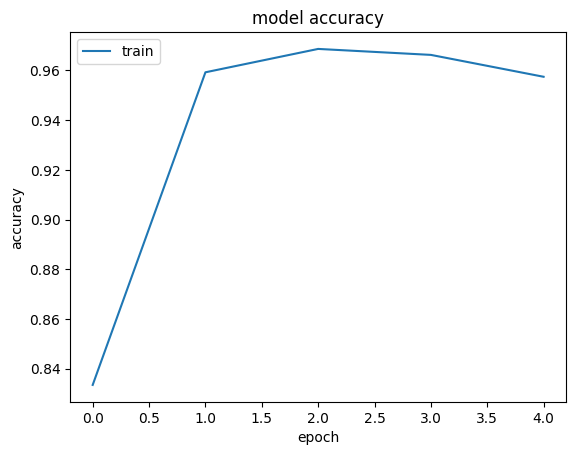

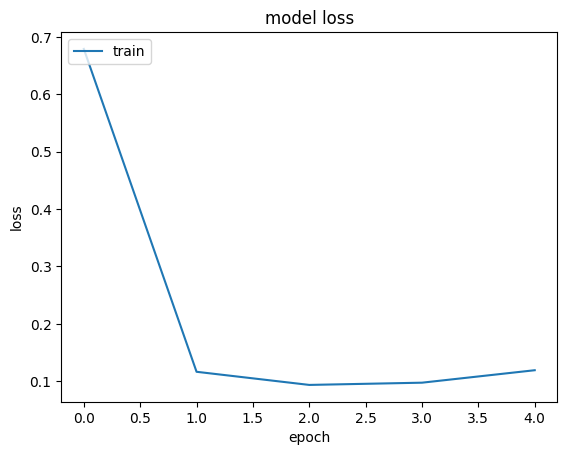

In [ ]:
visualization(history)

In [ ]:
# Evaluate the model.
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 1s 17ms/step - loss: 0.0715 - accuracy: 0.9740


[0.07145139575004578, 0.9739999771118164]

### Using Model

In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(X_test[:20])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # axis=1 returns the indices with max value of each prediction

# Check our predictions against the ground truths.
print(y_test[:20])

1/1 [==============================] - 0s 141ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   test_label
0     Arborio
1     Arborio
2     Arborio
3     Arborio
4     Arborio
5     Arborio
6     Arborio
7     Arborio
8     Arborio
9     Arborio
10    Arborio
11    Arborio
12    Arborio
13    Arborio
14    Arborio
15    Arborio
16    Arborio
17    Arborio
18    Arborio
19    Arborio


In [ ]:
figuresPath1 = '/content/drive/MyDrive/Colab Notebooks/data/Ipsala (15000).jpg'

In [ ]:
test_IMG = Image.open(figuresPath1).convert('L')

In [ ]:
test_IMG = np.array(test_IMG)

In [ ]:
# Normalize the images.
test_IMG = (test_IMG / 255) - 0.5
print(test_IMG) # (10000, 250, 250)

# Flatten the images.
test_IMG = test_IMG.reshape((-1, 250*250))

[[-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 ...
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]]


In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(test_IMG)

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # axis=1 returns the indices with max value of each prediction


1/1 [==============================] - 0s 51ms/step
[2]


# Tuning Hyperparameters

#### Learning rate

In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(62500,)),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(5, activation='softmax'),
])

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.0005),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history2 = model.fit(
  X_train,
  keras.utils.to_categorical(y_train_num),
  epochs=5,
  batch_size=32,
)


Epoch 1/5
313/313 [==============================] - 19s 57ms/step - loss: 0.3950 - accuracy: 0.8694
Epoch 2/5
313/313 [==============================] - 18s 57ms/step - loss: 0.1452 - accuracy: 0.9483
Epoch 3/5
313/313 [==============================] - 18s 59ms/step - loss: 0.1140 - accuracy: 0.9582
Epoch 4/5
313/313 [==============================] - 18s 58ms/step - loss: 0.1148 - accuracy: 0.9605
Epoch 5/5
313/313 [==============================] - 17s 54ms/step - loss: 0.0741 - accuracy: 0.9737


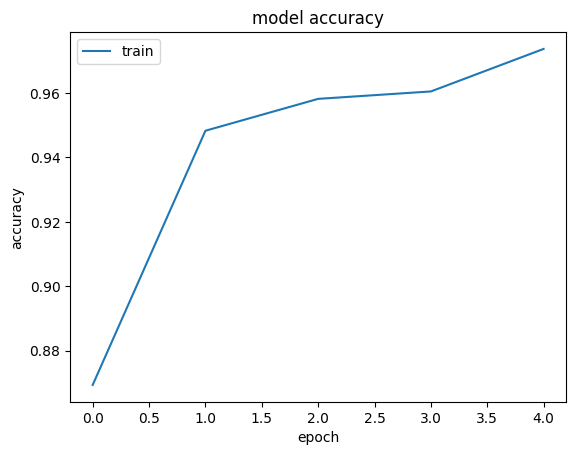

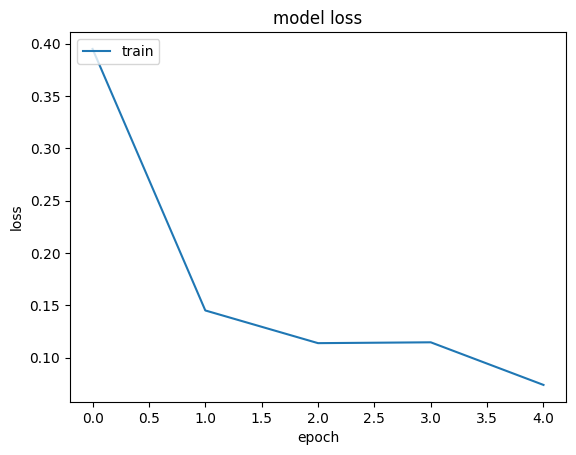

In [ ]:
visualization(history2)

In [ ]:
# Evaluate the model.
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 1s 12ms/step - loss: 0.4137 - accuracy: 0.8930


[0.4137301743030548, 0.8930000066757202]

#### Network Depth

In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(62500,)),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(5, activation='softmax'),
])

In [ ]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Train the model.
history3 = model.fit(
  X_train, # training data
  keras.utils.to_categorical(y_train_num), # training targets in one-hot manner
  epochs=5,
  batch_size=32,
)


Epoch 1/5
313/313 [==============================] - 19s 58ms/step - loss: 0.6330 - accuracy: 0.8379
Epoch 2/5
313/313 [==============================] - 18s 58ms/step - loss: 0.1581 - accuracy: 0.9431
Epoch 3/5
313/313 [==============================] - 18s 59ms/step - loss: 0.1384 - accuracy: 0.9545
Epoch 4/5
313/313 [==============================] - 17s 56ms/step - loss: 0.1301 - accuracy: 0.9531
Epoch 5/5
313/313 [==============================] - 17s 54ms/step - loss: 0.1319 - accuracy: 0.9556


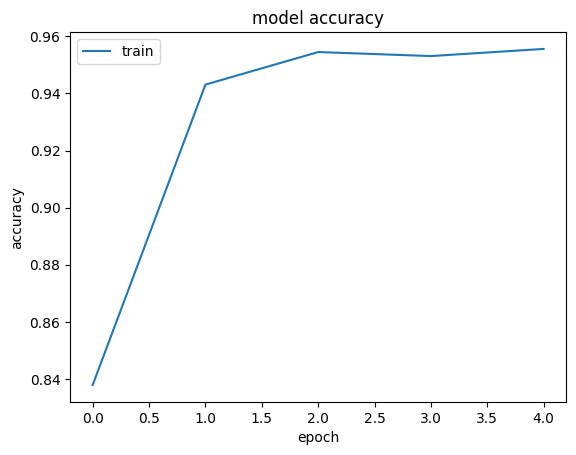

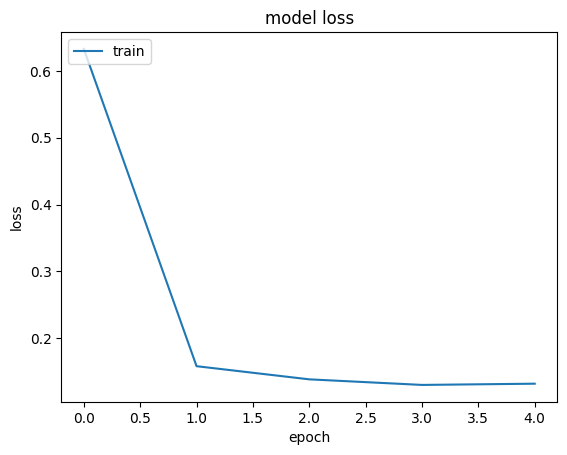

In [ ]:
visualization(history3)

In [ ]:
# Evaluate the model.
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 1s 12ms/step - loss: 0.1150 - accuracy: 0.9645


[0.11501912027597427, 0.9645000100135803]

#### Activations

In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='sigmoid', input_shape=(62500,)),
  keras.layers.Dense(64, activation='sigmoid'),
  keras.layers.Dense(5, activation='softmax'),
])

In [ ]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Train the model.
history4 = model.fit(
  X_train, # training data
  keras.utils.to_categorical(y_train_num), # training targets in one-hot manner
  epochs=5,
  batch_size=32,
)

Epoch 1/5
313/313 [==============================] - 18s 55ms/step - loss: 1.6147 - accuracy: 0.1975
Epoch 2/5
313/313 [==============================] - 17s 55ms/step - loss: 1.6143 - accuracy: 0.2033
Epoch 3/5
313/313 [==============================] - 18s 58ms/step - loss: 1.6145 - accuracy: 0.2004
Epoch 4/5
313/313 [==============================] - 17s 54ms/step - loss: 1.6139 - accuracy: 0.2014
Epoch 5/5
313/313 [==============================] - 17s 54ms/step - loss: 1.6132 - accuracy: 0.1982


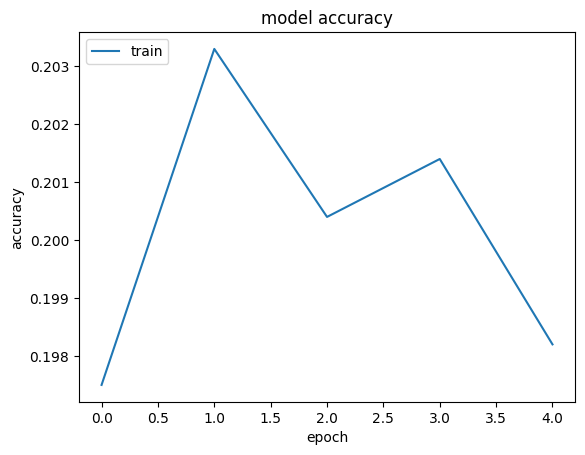

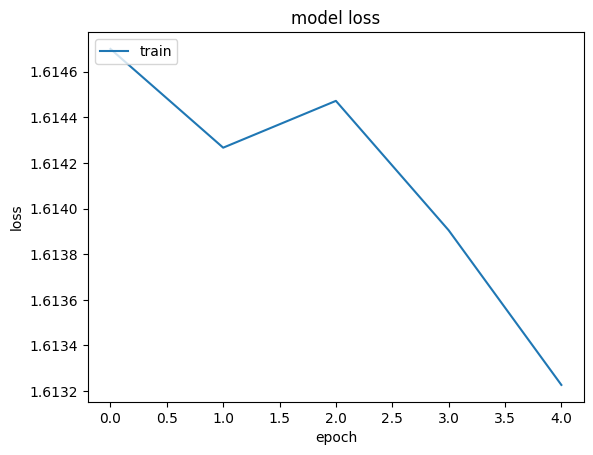

In [ ]:
visualization(history4)

In [ ]:
# Evaluate the model.
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 1s 12ms/step - loss: 1.6137 - accuracy: 0.2000


[1.613678216934204, 0.20000000298023224]

#### Validation

In [ ]:
# Build the model.
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(62500,)),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(5, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [ ]:
history5 = model.fit(
  X_train,
  keras.utils.to_categorical(y_train_num),
  epochs=5,
  batch_size=32,
  validation_data=(X_test, keras.utils.to_categorical(y_test_num))
)

Epoch 1/5
313/313 [==============================] - 23s 69ms/step - loss: 0.8583 - accuracy: 0.8318 - val_loss: 0.1657 - val_accuracy: 0.9440
Epoch 2/5
313/313 [==============================] - 20s 63ms/step - loss: 0.2163 - accuracy: 0.9320 - val_loss: 0.3105 - val_accuracy: 0.9170
Epoch 3/5
313/313 [==============================] - 20s 65ms/step - loss: 0.1944 - accuracy: 0.9425 - val_loss: 0.3798 - val_accuracy: 0.8850
Epoch 4/5
313/313 [==============================] - 19s 61ms/step - loss: 0.0947 - accuracy: 0.9688 - val_loss: 0.2979 - val_accuracy: 0.9050
Epoch 5/5
313/313 [==============================] - 21s 66ms/step - loss: 0.1182 - accuracy: 0.9620 - val_loss: 0.0934 - val_accuracy: 0.9695


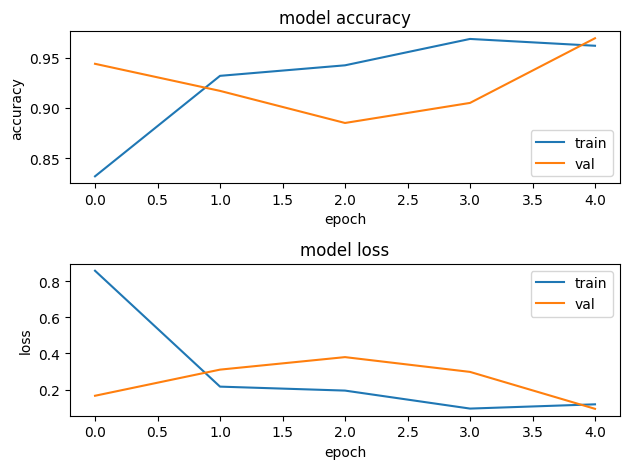

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()

In [ ]:
# Evaluate the model.
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 1s 13ms/step - loss: 0.0934 - accuracy: 0.9695


[0.09336927533149719, 0.9695000052452087]